<a href="https://colab.research.google.com/github/DonaldTurton/iLab2/blob/master/Modelling_4hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ILab2

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the data

In [2]:
data_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Merged_datasets/bit_eth_xrp_4hr.csv"
data = pd.read_csv (data_url)

# Lag the predictor variables 7 days

In [3]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

In [4]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol', 'date', 'time.1'], axis = 1)

In [5]:
# Remove the last 8 rows of data so that the data only goes up until 3/8/2020 (end of first week in August)
data = data.iloc[:-8]

In [6]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(42)
data['ETHER_close'] = data['ETHER_close'].shift(42)
data['ETHER_vol'] = data['ETHER_vol'].shift(42)

data['XRP_open'] = data['XRP_open'].shift(42)
data['XRP_close'] = data['XRP_close'].shift(42)
data['XRP_vol'] = data['XRP_vol'].shift(42)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(42)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(42)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(42)

In [7]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(42).index, inplace=True)

# Set the test and train sets

In [8]:
len(data)

6986

In [9]:
# Set the  data index as a data col
data.index = range(1,6987)

In [10]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:6420]
test_may = data[6421:6463]

In [11]:
# July train and test sets
train_july = data[1:6786]
test_july = data[6787:6830]

# Donald Modelling

In [45]:
# DATA FRAME WITH DATES AS INDEX FOR PLOTS IN X AXIS
data2 = data

# Convert Date column to Date format.  
data2["time"] = pd.to_datetime(data2["time"], dayfirst=True )  #, format ='%d/%m/%y', errors='ignore'

#Set Date as Index
data2 = data2.set_index('time')#.asfreq('d')

In [46]:
#COPY FOR DATA2
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data2[1:6420]
test_may = data2[6421:6463]

## MAY Pred

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']
# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']

In [53]:
# Random Forest tunning 
RandomForestRegression = RandomForestRegressor(n_estimators=500)

In [54]:

RandomForestRegression.fit(x_train_may, y_train_may)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_prediction = RandomForestRegression.predict(x_test_may)
y_prediction

array([8073.84534258, 8180.39025371, 8121.84815071, 7998.79051325,
       8121.69059269, 8068.38688294, 7971.69209001, 8030.31167328,
       7601.57484023, 7624.92013731, 7564.51053749, 7533.08806071,
       7536.15970638, 7540.004914  , 7393.83368252, 7497.65977717,
       7439.71888064, 6934.12294828, 5921.70265064, 6557.90258787,
       6176.74745   , 6782.45533608, 6804.22924853, 5646.61532687,
       6503.68179641, 6684.52010603, 5947.86901635, 5954.56388072,
       6344.9370731 , 6013.34049395, 5946.36594885, 5840.26881767,
       5906.82707274, 6896.06636698, 8003.90207575, 7997.52876089,
       9371.13145076, 9356.47513487, 6956.64165616, 5898.13171471,
       6109.58082735, 5709.53757164])

In [56]:
rf_mse = mean_squared_error(y_test_may, y_prediction)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

2168.503589718885

In [58]:
y_test_may = pd.DataFrame(y_test_may)
#y_test_may['index'] = range(1,8)

In [59]:
y_prediction = pd.DataFrame(y_prediction)
y_prediction.index=y_test_may.index
y_prediction.columns=['Prediction']

In [60]:
#Merge predicted vs actual 
#PredictionVSactual = y_test_may.merge(y_prediction, on=None, how='left')

PredictionVSactual = y_test_may.join(y_prediction)


#PredictionVSactual = PredictionVSactual.set_index('time')
#PredictionVSactual.columns=['Prediction','Index' ,'Real']

#PredictionVSactual = PredictionVSactual[['Prediction', 'Real']]

PredictionVSactual

,BTC_close,Prediction
time,,
2020-05-01 00:00:00+00:00,8676.147060,8073.845343
2020-05-01 04:00:00+00:00,8771.200000,8180.390254
2020-05-01 08:00:00+00:00,9009.700000,8121.848151
2020-05-01 12:00:00+00:00,8741.600000,7998.790513
2020-05-01 16:00:00+00:00,8735.500000,8121.690593
2020-05-01 20:00:00+00:00,8822.800000,8068.386883
2020-05-02 00:00:00+00:00,8838.368269,7971.692090
2020-05-02 04:00:00+00:00,8807.300000,8030.311673
2020-05-02 08:00:00+00:00,8851.500000,7601.574840


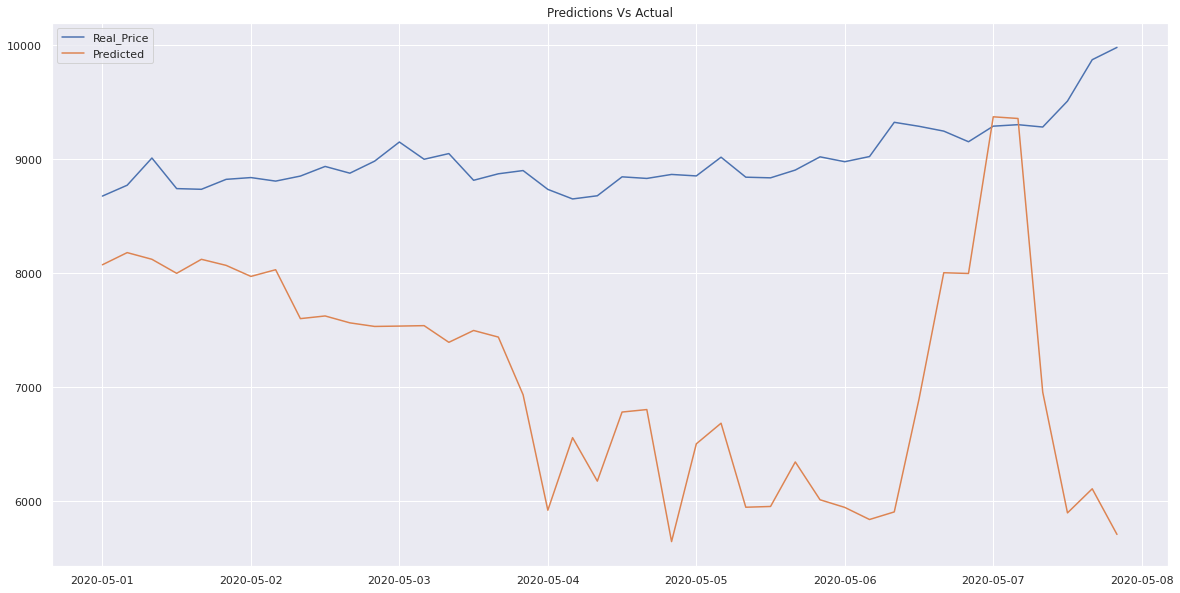

In [61]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# plot
plt.plot(PredictionVSactual)
plt.title("Predictions Vs Actual")
plt.legend(['Real_Price','Predicted'],loc='upper left')
plt.show()

## July

In [47]:
#COPY 
# July train and test sets
train_july = data2[1:6786]
test_july = data2[6787:6830]

In [48]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']
# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']

In [49]:
RandomForestRegression.fit(x_train_july, y_train_july)

NameError: ignored

In [ ]:
y_prediction_july = RandomForestRegression.predict(x_test_july)
y_prediction_july

array([9240.18784602, 9221.15018343, 9065.10778367, 9213.46575495,
       9065.47480526, 9024.39963494, 8833.9594944 , 8502.33066606,
       9111.42001505, 9039.95125472, 9015.0624398 , 9095.79210159,
       9129.99043982, 8766.67218644, 8591.74969205, 9073.23785609,
       8995.46346783, 9067.91046875, 9035.68666175, 9058.28976187,
       9076.8273175 , 8899.45244805, 9376.54449056, 9524.74196141,
       9436.52184899, 9494.82761909, 9459.02239562, 9039.36145891,
       9315.67929529, 9449.23070139, 9410.89358168, 9413.41445803,
       9376.44005743, 9253.99886013, 8969.49472626, 9209.89094512,
       9206.42184815, 9193.75798177, 9076.01693669, 9195.46752616,
       9214.87126634, 9187.1150946 , 9180.65558304])

In [ ]:
rf_mse = mean_squared_error(y_test_july, y_prediction_july)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

239.1155541361132

In [ ]:
y_test_july = pd.DataFrame(y_test_july)
#y_test_may['index'] = range(1,8)


In [ ]:
y_prediction_july = pd.DataFrame(y_prediction_july)
y_prediction_july.index=y_test_july.index
y_prediction_july.columns=['Prediction']
#y_prediction['index'] = range(1,8)

In [ ]:
#Merge predicted vs actual 
#PredictionVSactual = y_test_may.merge(y_prediction, on=None, how='left')

PredictionVSactual_july = y_test_july.join(y_prediction_july)


#PredictionVSactual = PredictionVSactual.set_index('time')
#PredictionVSactual.columns=['Prediction','Index' ,'Real']

PredictionVSactual = PredictionVSactual[['Prediction', 'Real']]

In [ ]:
PredictionVSactual.columns = ['real', 'Random_Forest']

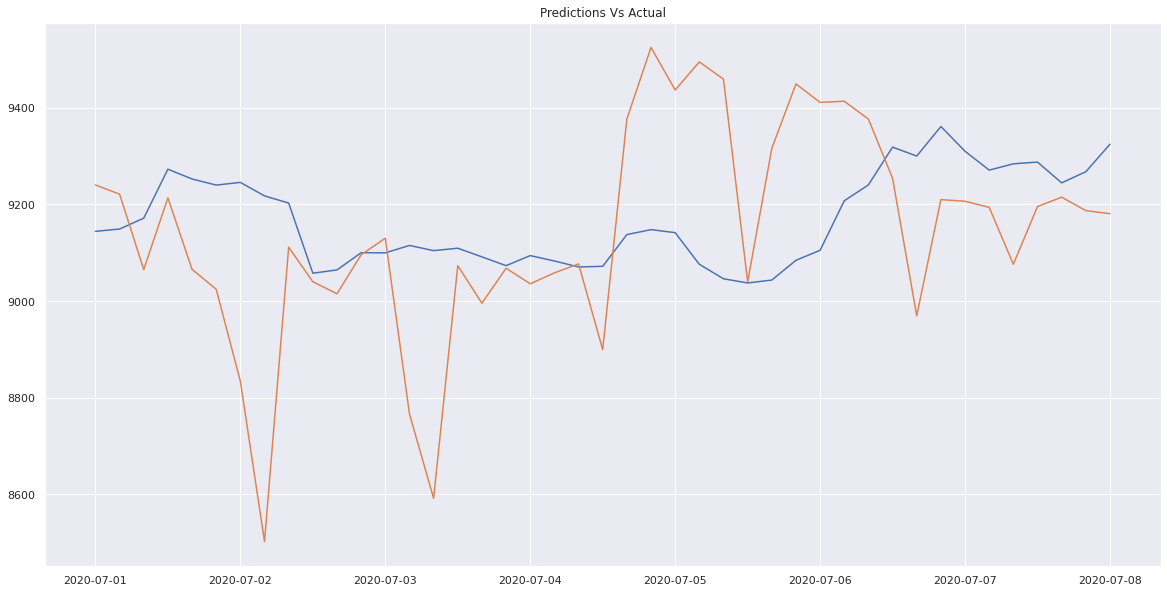

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# plot
plt.plot(PredictionVSactual_july)
plt.title("Predictions Vs Actual")
#plt.legend(['Real_Price','Predicted'],loc='upper left')
plt.show()

# **Rob Modelling**

#  Set test and train sets


In [12]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']


In [13]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']


# Linear Model - May

In [14]:
# Import the requried packages for the linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_may, y_train_may)

In [16]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_may,x_train_may).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          4.197e+04
Date:                Mon, 21 Sep 2020   Prob (F-statistic):                        0.00
Time:                        03:36:39   Log-Likelihood:                         -53461.
No. Observations:                6419   AIC:                                  1.069e+05
Df Residuals:                    6410   BIC:                                  1.070e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.0437      1.652      0.632      0.528      -2.195       4.282
ETHER_close      -1.5923      1.651     -0.964      0.335      -4.830       1.645
ETHER_vol        -0.0014      0.000     -3.412      0.001      -0.002      -0.001
XRP_open      -2081.5230    687.835     -3.026      0.002   -3429.909    -733.137
XRP_close      1530.3725    690.146      2.217      0.027     177.455    2883.290
XRP_vol       -2.057e-06   1.23e-06     -1.672      0.095   -4.47e-06    3.55e-07
BTC_open_dup      0.0607      0.100      0.609      0.543      -0.135       0.256
BTC_close_dup     0.9659      0.099      9.709      0.000       0.771       1.161
BTC_vol_dup       0.0558      0.004     15.452      0.000       0.049       0.063
==============================================================================
Omnibus:                      928.003   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13517.548
Skew:                          -0.117   Prob(JB):                         0.00
Kurtosis:                      10.105   Cond. No.                     1.13e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Predict the model on the x_test data
y_pred_may = pd.DataFrame(model.predict(x_test_may))
y_pred_may['index'] = range(1,43)

In [19]:
y_test_may = pd.DataFrame(y_test_may)[0:42]
y_test_may['index'] = range(1,43)

In [21]:
# merge the prediction and actual data frames
merge_may = y_pred_may.merge(y_test_may, on='index', how='left')

In [28]:
merge_may.columns = ['Linear Regressor', 'index', 'Real Prices']

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lm_prediction)
np.sqrt(MSE)

1061.4130406253307

In [25]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_may, y_train_may)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8874040949577134


In [ ]:
merge_may

In [101]:
date_time = pd.DataFrame(data.time[6421:6463])

date_time['index'] = range(1,43)

merge_may = merge_may.merge(date_time, on='index', how='left')

#merge_may['Date/Time'] = date_time.time

merge_may

,lm_prediction,index,Real Prices,Support Vector Regression,Random Forest,VNN,Date/Time,time
0,7609.083383,1,8676.147060,6134.704695,8073.845343,6197.521484,NaT,2020-05-01 00:00:00+00:00
1,7671.797206,2,8771.200000,6374.439959,8180.390254,6146.685547,NaT,2020-05-01 04:00:00+00:00
2,7607.864563,3,9009.700000,6191.017823,8121.848151,6075.756836,NaT,2020-05-01 08:00:00+00:00
3,7753.161378,4,8741.600000,6572.293726,7998.790513,6313.697266,NaT,2020-05-01 12:00:00+00:00
4,7646.889520,5,8735.500000,6404.748708,8121.690593,6235.115234,NaT,2020-05-01 16:00:00+00:00
5,7705.985637,6,8822.800000,6509.530139,8068.386883,6259.481934,NaT,2020-05-01 20:00:00+00:00
6,7606.523613,7,8838.368269,6390.589862,7971.692090,6258.492676,NaT,2020-05-02 00:00:00+00:00
7,7510.311996,8,8807.300000,6922.975461,8030.311673,5824.651367,NaT,2020-05-02 04:00:00+00:00
8,7636.616544,9,8851.500000,6689.908856,7601.574840,5915.305176,NaT,2020-05-02 08:00:00+00:00
9,7616.005821,10,8936.000000,6770.006814,7624.920137,5841.517578,NaT,2020-05-02 12:00:00+00:00


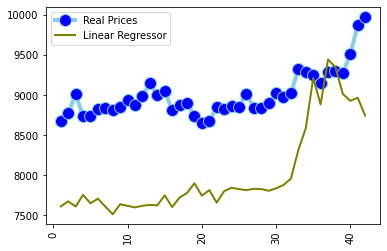

In [32]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real Prices', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Linear Regressor', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - May

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)#GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_may, y_train_may)

In [ ]:
# Predict the model on the x_test data
y_pred_may_lasso = pd.DataFrame(lasso.predict(x_test_may))
y_pred_may_lasso['index'] = range(1,8)

In [ ]:
y_pred_may_lasso

,0,index
0,7619.051456,1
1,7540.843968,2
2,7704.844636,3
3,7797.110522,4
4,7814.768118,5
5,8932.928478,6
6,8831.216923,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_lasso, on='index', how='left')

In [ ]:
merge_may

,lm_prediction,index,real,0
0,7626.086948,1,8822.800000,7619.051456
1,7526.599476,2,8982.300000,7540.843968
2,7690.725950,3,8899.800000,7704.844636
3,7793.804550,4,8865.800000,7797.110522
4,7850.899369,5,9020.100000,7814.768118
5,8888.264968,6,9152.470993,8932.928478
6,8836.952715,7,9979.600000,8831.216923


In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lasso_prediction)
np.sqrt(MSE)

1128.6293280870077

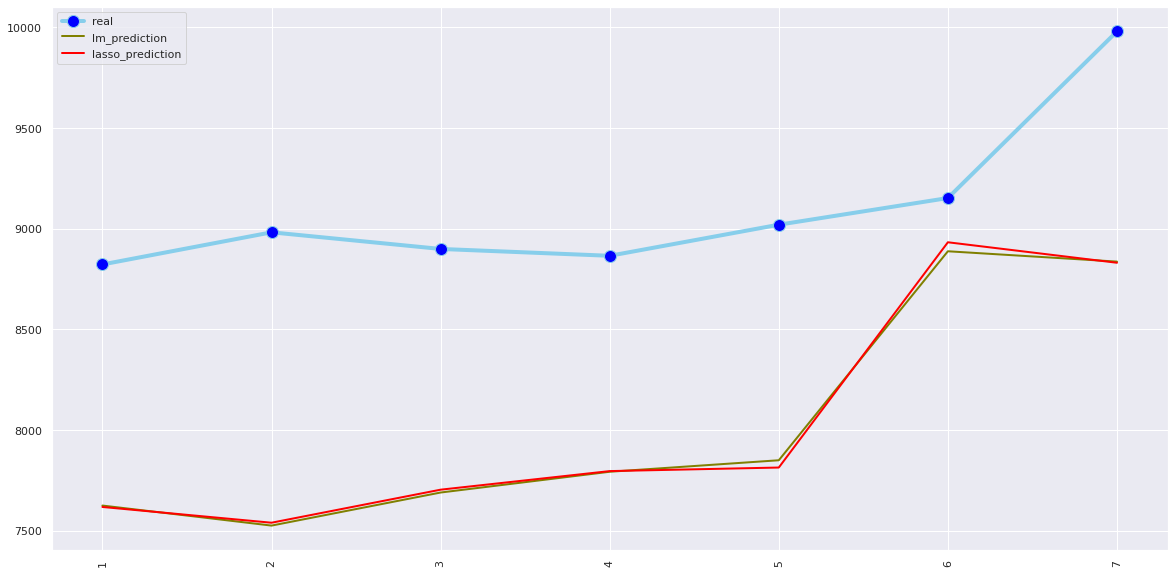

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - May

In [33]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
y_train_may = pd.DataFrame(y_train_may)

In [35]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_may)
y = sc_y.fit_transform(y_train_may)

In [36]:
y = y[:, 0]

In [37]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'poly')
SVR_reg = svr_regressor.fit(X, y)

In [38]:
# Predict the model on the x_test data
x_test_may = sc_X.fit_transform(x_test_may)

y_pred_may_svr = SVR_reg.predict(x_test_may)
y_pred_may_svr = sc_y.inverse_transform(y_pred_may_svr) 


y_pred_may_svr = pd.DataFrame(y_pred_may_svr)
y_pred_may_svr['index'] = range(1,43)
y_pred_may_svr

,0,index
0,6134.704695,1
1,6374.439959,2
2,6191.017823,3
3,6572.293726,4
4,6404.748708,5
5,6509.530139,6
6,6390.589862,7
7,6922.975461,8
8,6689.908856,9
9,6770.006814,10


In [39]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_svr, on='index', how='left')

In [43]:
merge_may.columns = ['lm_prediction', 'index', 'Real Prices', 'Support Vector Regression']

In [ ]:
#merge_may['Avg'] = (merge_may['lm_prediction'] + merge_may['random_forest']) / 2

#merge_may

In [64]:
# Merge Donald's RF prediction into the same plot
PredictionVSactual.columns = ['Real Prices', 'Random Forest']

merge_may = merge_may.merge(PredictionVSactual, on='Real Prices', how='left')
merge_may

,lm_prediction,index,Real Prices,Support Vector Regression,Random Forest
0,7609.083383,1,8676.147060,6134.704695,8073.845343
1,7671.797206,2,8771.200000,6374.439959,8180.390254
2,7607.864563,3,9009.700000,6191.017823,8121.848151
3,7753.161378,4,8741.600000,6572.293726,7998.790513
4,7646.889520,5,8735.500000,6404.748708,8121.690593
5,7705.985637,6,8822.800000,6509.530139,8068.386883
6,7606.523613,7,8838.368269,6390.589862,7971.692090
7,7510.311996,8,8807.300000,6922.975461,8030.311673
8,7636.616544,9,8851.500000,6689.908856,7601.574840
9,7616.005821,10,8936.000000,6770.006814,7624.920137


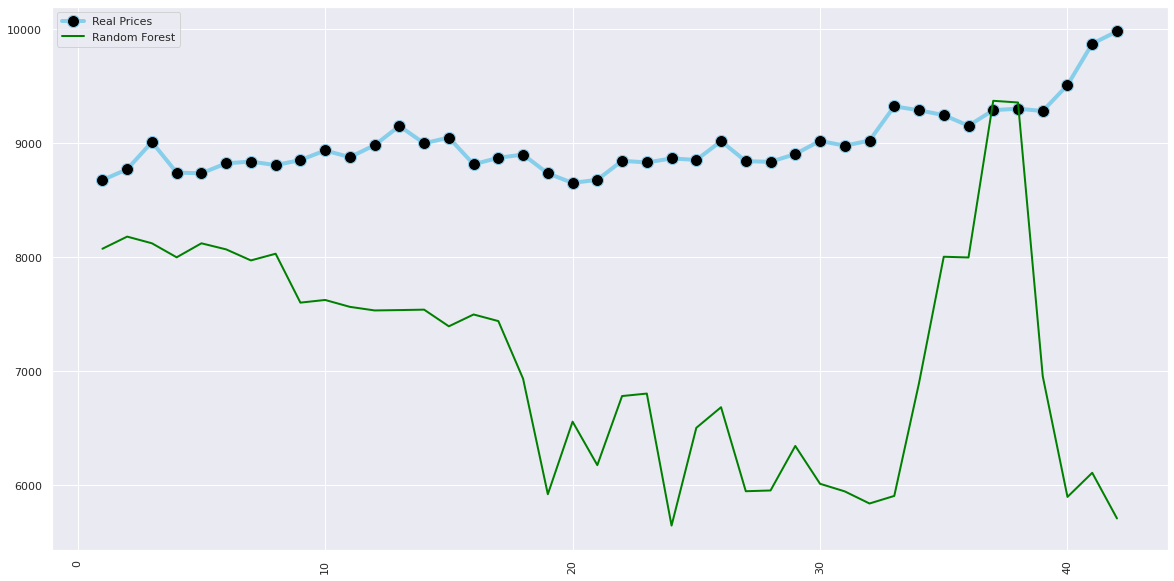

In [67]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real Prices', data=merge_may, marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
#plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
#plt.plot( 'index', 'Support Vector Regression', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'Random Forest', data=merge_may, marker='', color='green', linewidth=2)
#plt.plot( 'index', 'Avg', data=merge_may, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Linear Model - July

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_july, y_train_july)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_july,x_train_july).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.713e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):                        0.00
Time:                        06:15:15   Log-Likelihood:                         -56389.
No. Observations:                6785   AIC:                                  1.128e+05
Df Residuals:                    6776   BIC:                                  1.129e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.0513      1.620      0.649      0.516      -2.124       4.226
ETHER_close      -1.6013      1.619     -0.989      0.323      -4.775       1.572
ETHER_vol        -0.0013      0.000     -3.374      0.001      -0.002      -0.001
XRP_open      -2105.5623    675.329     -3.118      0.002   -3429.419    -781.705
XRP_close      1549.7342    677.622      2.287      0.022     221.381    2878.087
XRP_vol       -2.097e-06   1.21e-06     -1.737      0.082   -4.46e-06     2.7e-07
BTC_open_dup      0.0672      0.096      0.698      0.485      -0.121       0.256
BTC_close_dup     0.9602      0.096      9.989      0.000       0.772       1.149
BTC_vol_dup       0.0554      0.004     15.670      0.000       0.048       0.062
==============================================================================
Omnibus:                      996.050   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15050.622
Skew:                          -0.113   Prob(JB):                         0.00
Kurtosis:                      10.293   Cond. No.                     1.13e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_july = pd.DataFrame(model.predict(x_test_july))
y_pred_july['index'] = range(1,44)

In [ ]:
y_test_july = pd.DataFrame(y_test_july)[0:43]
y_test_july['index'] = range(1,44)

In [ ]:
# merge the prediction and actual data frames
merge_july = y_pred_july.merge(y_test_july, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lm_prediction)
np.sqrt(MSE)

149.25426691012004

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_july, y_train_july)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8885624390202781


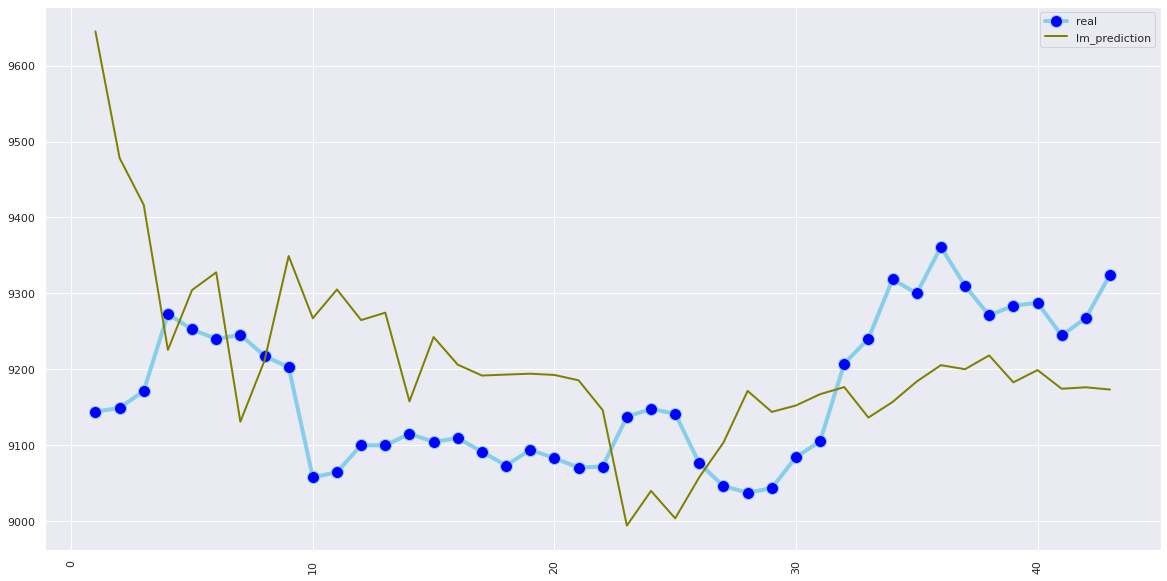

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - July

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_july, y_train_july)

In [ ]:
print(lasso.best_params_)

{'alpha': 1e-15}


In [ ]:
print(lasso.best_score_)

-997010.4666424043


In [ ]:
# Predict the model on the x_test data
y_pred_july_lasso = pd.DataFrame(lasso.predict(x_test_july))
y_pred_july_lasso['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_lasso, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lasso_prediction)
np.sqrt(MSE)

127.57497646038792

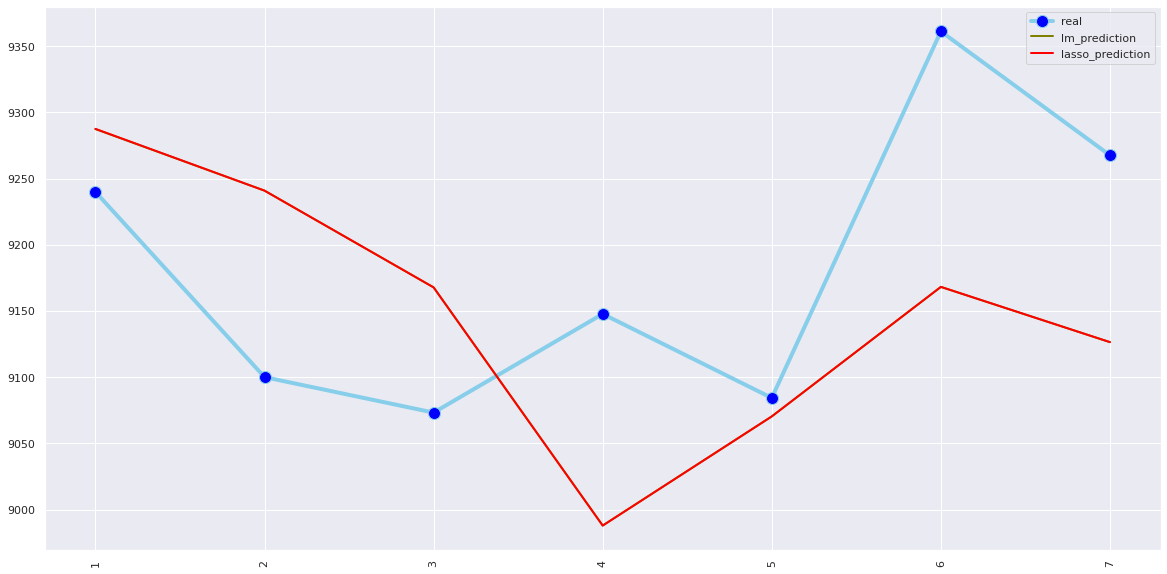

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - July

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_july = pd.DataFrame(y_train_july)

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_july)
y = sc_y.fit_transform(y_train_july)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'rbf')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_july = sc_X.fit_transform(x_test_july)

y_pred_july_svr = SVR_reg.predict(x_test_july)
y_pred_july_svr = sc_y.inverse_transform(y_pred_july_svr) 


y_pred_july_svr = pd.DataFrame(y_pred_july_svr)
y_pred_july_svr['index'] = range(1,44)


,0,index
0,12191.422978,1
1,13053.868613,2
2,12458.694354,3
3,9568.085073,4
4,10359.999284,5
5,9447.051027,6
6,7251.732490,7
7,7510.086781,8
8,8374.993429,9
9,7834.668906,10


In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_svr, on='index', how='left')

In [ ]:
# Merge Donald's July predictions into the merge_july data frame
PredictionVSactual_july.columns = ['real', 'random_forest']

merge_july = merge_july.merge(PredictionVSactual_july, on='real', how='left')

merge_july

,lm_prediction,index,real,svr_prediction,random_forest
0,9645.113676,1,9144.200000,12191.422978,9240.187846
1,9478.411344,2,9149.000000,13053.868613,9221.150183
2,9416.573032,3,9171.500000,12458.694354,9065.107784
3,9225.504140,4,9272.800000,9568.085073,9213.465755
4,9304.367733,5,9252.500000,10359.999284,9065.474805
5,9327.668713,6,9239.900000,9447.051027,9024.399635
6,9130.898830,7,9245.500000,7251.732490,8833.959494
7,9211.428208,8,9217.500000,7510.086781,8502.330666
8,9349.206735,9,9202.700000,8374.993429,9111.420015
9,9267.288022,10,9057.571519,7834.668906,9039.951255


In [ ]:
merge_july['Average'] = (merge_july['lm_prediction'] + merge_july['random_forest'])/2
merge_july

,lm_prediction,index,real,lasso_prediction,svr_prediction,random_forest,Average
0,9287.319380,1,9239.900000,9287.504325,11114.335817,9343.880558,9315.599969
1,9240.831789,2,9100.000000,9240.842266,9753.279073,9292.273597,9266.552693
2,9167.753549,3,9073.200000,9167.767675,7710.265580,8951.153006,9059.453278
3,8987.913877,4,9147.700000,8987.861308,6254.006371,9307.651582,9147.782730
4,9070.336208,5,9084.284734,9070.317168,6684.506516,9229.655616,9149.995912
5,9168.129820,6,9361.100000,9168.154266,8418.032689,9207.732920,9187.931370
6,9126.409153,7,9267.514949,9126.411070,7517.340586,9180.592430,9153.500791


In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'svr_prediction']

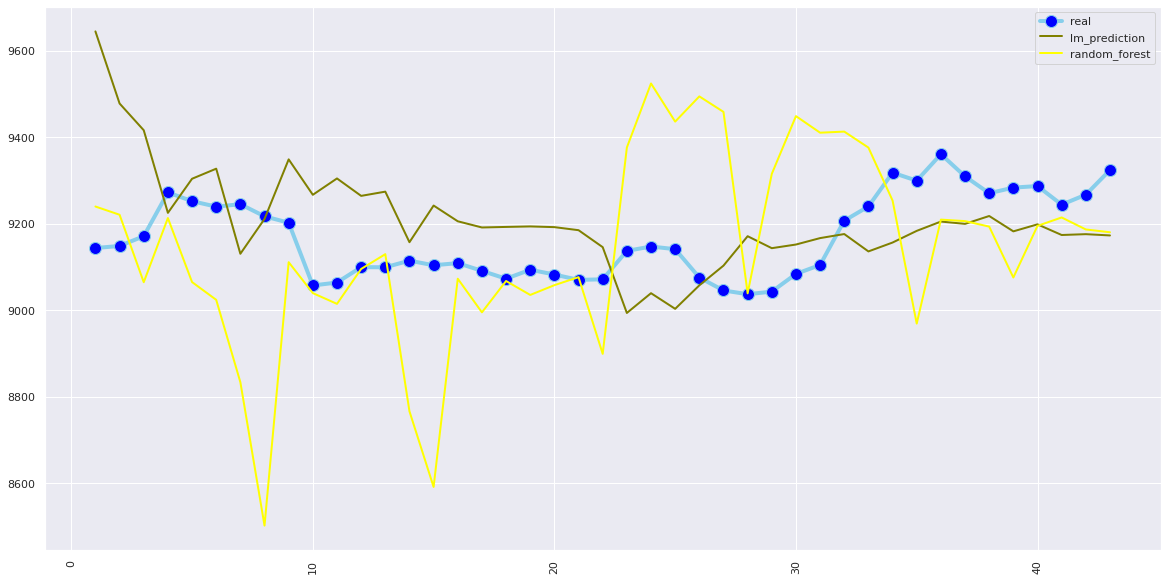

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
#plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
#plt.plot( 'index', 'svr_prediction', data=merge_july, marker='', color='green', linewidth=2)
plt.plot( 'index', 'random_forest', data=merge_july, marker='', color='yellow', linewidth=2)
#plt.plot( 'index', 'Average', data=merge_july, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Vanilla Neural Network - May

In [68]:
%tensorflow_version 2.x

In [69]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [70]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_may)
scaled_X_test = scale(x_test_may)

In [71]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [72]:
from tensorflow.keras.layers import Dense, Dropout

In [73]:
# Create a sequential model 

model = tf.keras.Sequential()

In [74]:
# create the architecture for the neural network

layer1 = Dense(128, activation='relu', input_shape=[9])

layer2 = Dense(128, activation='relu')

layer3 = Dense(128, activation='relu')

top_layer = Dense(1)

In [75]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(top_layer)

In [76]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [77]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [78]:
# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [79]:
history = model.fit(scaled_X_train, y_train_may, epochs=250, validation_split = 0.3)

Epoch 1/250
141/141 [==============================] - 0s 3ms/step - loss: 51600376.0000 - val_loss: 80041200.0000
Epoch 2/250
141/141 [==============================] - 0s 2ms/step - loss: 51506104.0000 - val_loss: 79874288.0000
Epoch 3/250
141/141 [==============================] - 0s 3ms/step - loss: 50845616.0000 - val_loss: 78982000.0000
Epoch 4/250
141/141 [==============================] - 0s 2ms/step - loss: 48158092.0000 - val_loss: 76392112.0000
Epoch 5/250
141/141 [==============================] - 0s 2ms/step - loss: 41657304.0000 - val_loss: 71395568.0000
Epoch 6/250
141/141 [==============================] - 0s 2ms/step - loss: 31615460.0000 - val_loss: 64102684.0000
Epoch 7/250
141/141 [==============================] - 0s 2ms/step - loss: 22108206.0000 - val_loss: 56186128.0000
Epoch 8/250
141/141 [==============================] - 0s 2ms/step - loss: 17008828.0000 - val_loss: 49312292.0000
Epoch 9/250
141/141 [==============================] - 0s 2ms/step - loss: 15301

In [81]:
# Make a prediction
preds_may = model.predict(scaled_X_test)

In [83]:
preds_may = pd.DataFrame(preds_may)

preds_may['index'] = range(1,43)

In [87]:
preds_may.columns = ['VNN', 'index']

merge_may = merge_may.merge(preds_may, on='index', how='left')
merge_may

,lm_prediction,index,Real Prices,Support Vector Regression,Random Forest,VNN
0,7609.083383,1,8676.147060,6134.704695,8073.845343,6197.521484
1,7671.797206,2,8771.200000,6374.439959,8180.390254,6146.685547
2,7607.864563,3,9009.700000,6191.017823,8121.848151,6075.756836
3,7753.161378,4,8741.600000,6572.293726,7998.790513,6313.697266
4,7646.889520,5,8735.500000,6404.748708,8121.690593,6235.115234
5,7705.985637,6,8822.800000,6509.530139,8068.386883,6259.481934
6,7606.523613,7,8838.368269,6390.589862,7971.692090,6258.492676
7,7510.311996,8,8807.300000,6922.975461,8030.311673,5824.651367
8,7636.616544,9,8851.500000,6689.908856,7601.574840,5915.305176
9,7616.005821,10,8936.000000,6770.006814,7624.920137,5841.517578


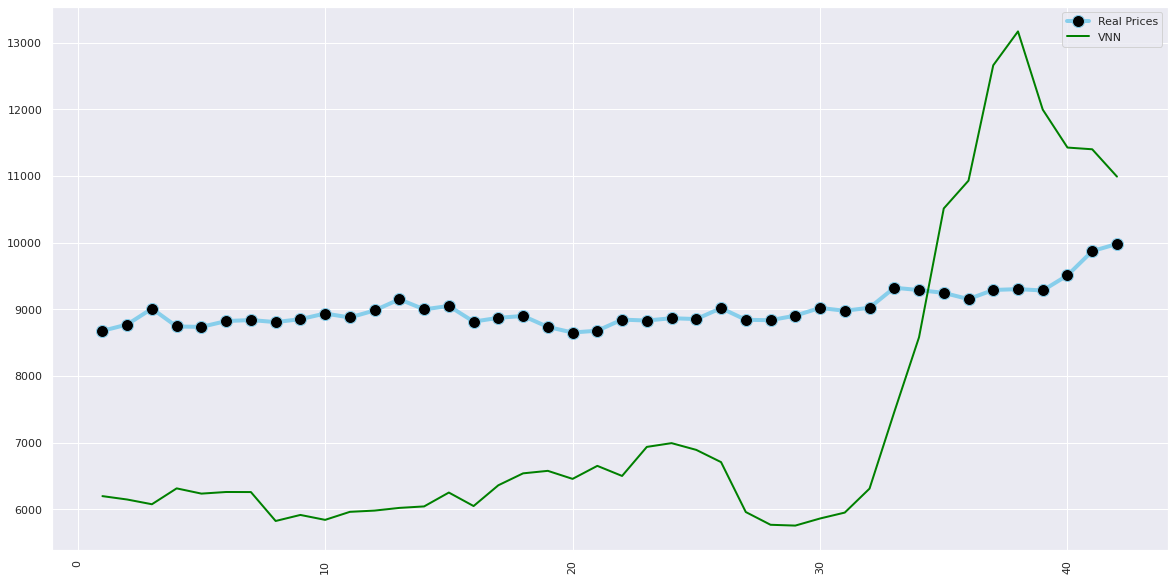

In [89]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real Prices', data=merge_may, marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
#plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
#plt.plot( 'index', 'svr_prediction', data=merge_may, marker='', color='green', linewidth=2)
#plt.plot( 'index', 'random_forest', data=merge_may, marker='', color='yellow', linewidth=2)
#plt.plot( 'index', 'Avg', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'VNN', data=merge_may, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Vanilla Neural Network - July



In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_july)
scaled_X_test = scale(x_test_july)
scaled_y_train = scale(y_train_july)
scaled_y_test = scale(y_test_july)

In [ ]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Create a sequential model 

model = tf.keras.Sequential()

In [ ]:
# create the architecture for the neural network

layer1 = Dense(128, activation='relu', input_shape=[9])

layer2 = Dense(128, activation='relu')

layer3 = Dense(128, activation='relu')

top_layer = Dense(1)

In [ ]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(top_layer)

In [ ]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [ ]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
history = model.fit(scaled_X_train, y_train_july, epochs=250, validation_split = 0.3)

Epoch 1/250
149/149 [==============================] - 1s 3ms/step - loss: 55060696.0000 - val_loss: 76875208.0000
Epoch 2/250
149/149 [==============================] - 0s 3ms/step - loss: 54941288.0000 - val_loss: 76663432.0000
Epoch 3/250
149/149 [==============================] - 0s 3ms/step - loss: 54070592.0000 - val_loss: 75538048.0000
Epoch 4/250
149/149 [==============================] - 0s 3ms/step - loss: 50601340.0000 - val_loss: 72467952.0000
Epoch 5/250
149/149 [==============================] - 0s 3ms/step - loss: 42442624.0000 - val_loss: 66757248.0000
Epoch 6/250
149/149 [==============================] - 0s 3ms/step - loss: 31175668.0000 - val_loss: 58870672.0000
Epoch 7/250
149/149 [==============================] - 0s 3ms/step - loss: 22379066.0000 - val_loss: 50672840.0000
Epoch 8/250
149/149 [==============================] - 0s 3ms/step - loss: 18762170.0000 - val_loss: 43428704.0000
Epoch 9/250
149/149 [==============================] - 0s 3ms/step - loss: 17137

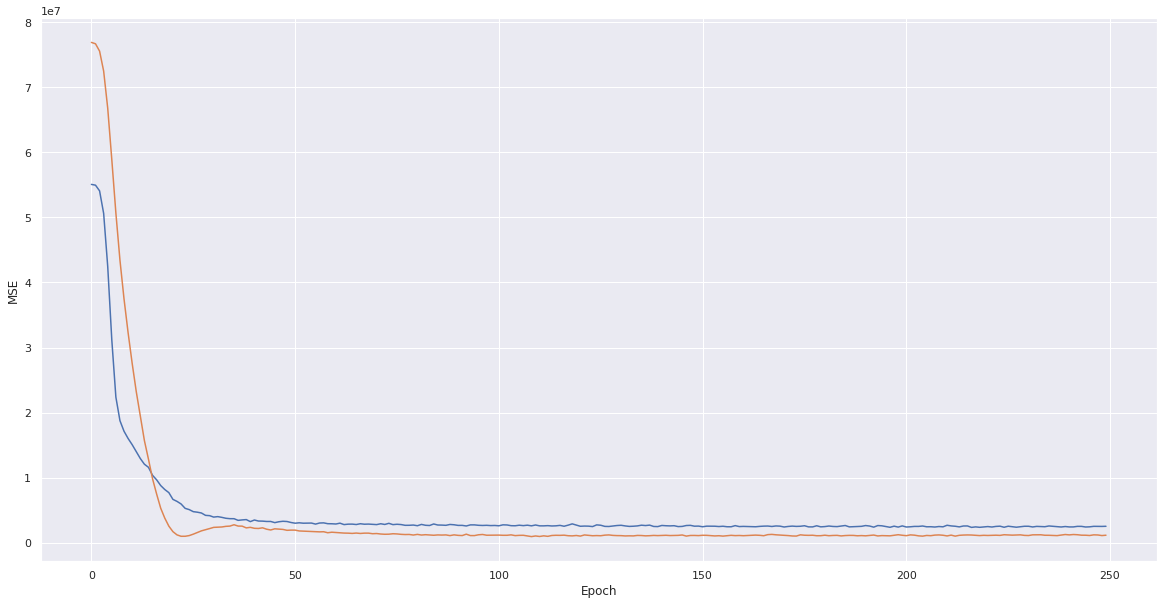

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='MSE training')
plt.plot(history.history['val_loss'], label='MSE validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Make a prediction
preds = model.predict(scaled_X_test)

In [ ]:
preds = pd.DataFrame(preds)

preds['index'] = range(1,44)

In [ ]:
preds.columns = ['VNN', 'index']

merge_july = merge_july.merge(preds, on='index', how='left')
merge_july

,lm_prediction,index,real,svr_prediction,random_forest,VNN
0,9645.113676,1,9144.200000,12191.422978,9240.187846,15692.604492
1,9478.411344,2,9149.000000,13053.868613,9221.150183,13993.608398
2,9416.573032,3,9171.500000,12458.694354,9065.107784,11483.086914
3,9225.504140,4,9272.800000,9568.085073,9213.465755,8532.162109
4,9304.367733,5,9252.500000,10359.999284,9065.474805,8674.673828
5,9327.668713,6,9239.900000,9447.051027,9024.399635,9147.419922
6,9130.898830,7,9245.500000,7251.732490,8833.959494,6627.950195
7,9211.428208,8,9217.500000,7510.086781,8502.330666,6242.972656
8,9349.206735,9,9202.700000,8374.993429,9111.420015,8180.597168
9,9267.288022,10,9057.571519,7834.668906,9039.951255,8012.706055


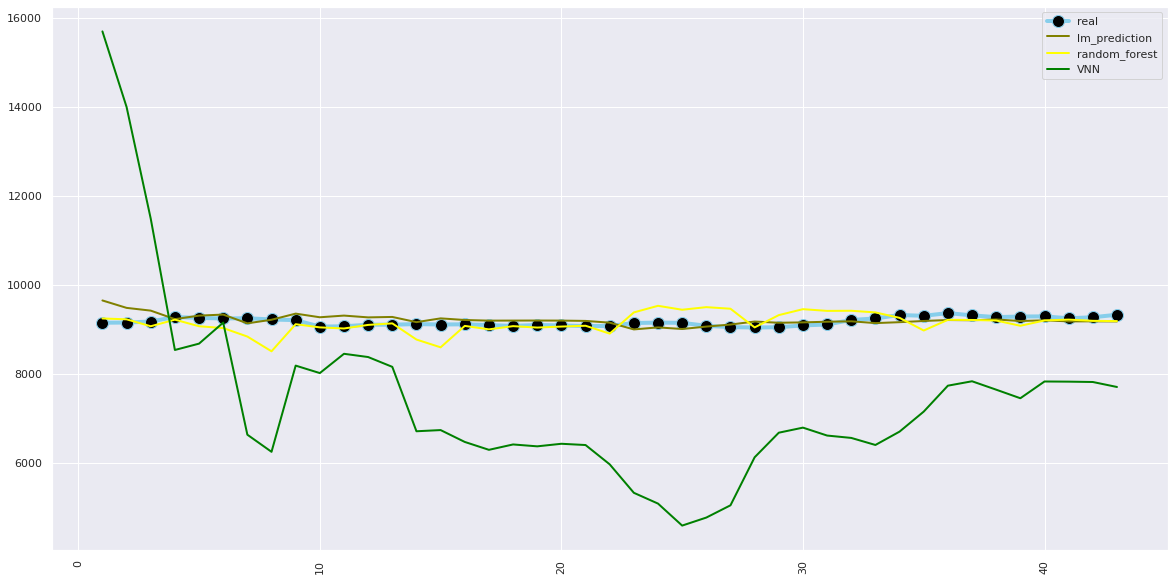

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
#plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
#plt.plot( 'index', 'svr_prediction', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'random_forest', data=merge_july, marker='', color='yellow', linewidth=2)
#plt.plot( 'index', 'Avg', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'VNN', data=merge_july, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()